<a href="https://colab.research.google.com/github/YanaChermashentseva/0_git_basics/blob/master/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A7%D0%B5%D1%80%D0%BC%D0%B0%D1%88%D0%B5%D0%BD%D1%86%D0%B5%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Использование методов машинного обучения в маркетинге для прогнозирования объёмов продаж товаров и услуг***

#Основной план работы#

**Цель:** Построить модель предсказания объемов продаж в маркетинге и сделать вовод о том, как насколько методы машинного обучения полезны в данной работе

**Задачи:**

1. Реализовать анализ набора данных
2. Построить модели на основе имеющихсяя данных
3. Выявить наилучшую модель  с наиболее выскоими показателями качества обучения модели

**Ожидаемый результат:**

Cоздание модели, которая эффективно предсказывает объемы продаж в зависимости от использованных маркетинговых стратегий.

**План работы:**

-	предварительная обработка данных (очистка, описание, разделение на обучающую и тестовую выборки);
-	построение модели и обучение модели на данных;
-	визуализация результатов работы модели.


#Импорт необходимых библиотек#


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Данные#

Набор данных в этой курсовой работе был взят с сайта kaggle: https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data

База содержит:

- TV - Бюджет на рекламу на телевидении (в миллионах)

- Radio - Бюджет на продвижение в соцсетях (в миллионах)

- Social Media - Бюджет на продвижение радио (в миллионах)

- Influencer - блогер (по уровням)

- Sales - Продажи (в миллионах)

Решаемая проблема - построение прогноза объема продаж на основе имеющихся данных об использованных маркетинговых стратегиях (телевидение, социальные сети, радио, блогеры)

*Задача регрессии относится к задачам обучения с учителем, поскольку нам заранее известен результат, который мы хотим получить.

Загрузим датасет и выведем первые строки 

In [6]:
data = pd.read_csv('/content/Dummy Data HSS.csv')
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400
9,13.0,0.431128,2.229423,Mega,48.280582


Создадим функцию, выводящую всю основную информацию о датасете, его размерности и типе столбцов

In [7]:
def information(data):
  print('              -Размер dataset-               ')
  print()
  print(data.shape)
  print()
  print('            -Столбцы, типы данных-           ')
  print()
  print(data.info())
  print()
  print('                 -Статистика-                ')
  print()
  print(data.describe())

In [8]:
information(data)

              -Размер dataset-               

(4572, 5)

            -Столбцы, типы данных-           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB
None

                 -Статистика-                

                TV        Radio  Social Media        Sales
count  4562.000000  4568.000000   4566.000000  4566.000000
mean     54.066857    18.160356      3.323956   192.466602
std      26.125054     9.676958      2.212670    93.133092
min      10.000000     0.000684      0.000031    31.199409
25%      32.000000    10.525957      1.527849   112.322882
50%      53.000000    17.85

#Анализ, очистка и подготовка данных#

***Проверям наличие нулевых значений в dataset***

In [9]:
data.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

Видим, что в четырех из пяти колонок есть пропущенные значения.

Все признаки являются значимыми и влияют на зависимую переменную Sales

Также у нас есть колонка Influencer с нечисловым типом данных, поэтому преобразуем данные в ней

In [10]:
data.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

Заполним пустые значения средними по каждому столбцу

In [11]:
data['TV']=data['TV'].fillna(data['TV'].mean())

In [12]:
data['Radio']=data['Radio'].fillna(data['Radio'].mean())
data['Social Media']=data['Social Media'].fillna(data['Social Media'].mean())
data['Sales']=data['Sales'].fillna(data['Sales'].mean())

In [13]:
data.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

Проверяем и видим, что пустые значения заполнены

Преобразуем данные из столбца Influencer

In [14]:
data['Influencer'].value_counts() # смотрим сами значения и их количество

Mega     1158
Micro    1153
Nano     1139
Macro    1122
Name: Influencer, dtype: int64

Разделяем на 4 колонки по категориям инфлюенсеров

In [15]:
influencer = pd.get_dummies(data["Influencer"]) 
influencer

,Macro,Mega,Micro,Nano
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
4567,0,0,1,0
4568,0,0,0,1
4569,0,0,1,0
4570,1,0,0,0


In [16]:
data = pd.concat([data,influencer],axis=1) 

In [17]:
data.head()

,TV,Radio,Social Media,Influencer,Sales,Macro,Mega,Micro,Nano
0,16.0,6.566231,2.907983,Mega,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,Mega,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,Mega,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,Mega,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,Micro,56.594181,0,0,1,0


In [18]:
data=data.drop('Influencer',axis=1) #удаляем столбец с нечисловыми данными

Проверим датасет на наличие дубликатов

In [19]:
data.duplicated().sum()

0

Дубликатов нет, значит очистка датасета не требуется 

Поскольку данные у нас не приведены к одной шкале, используем StandardScaler

Eсли не сделать данную процедуру - модель будет неточна

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled,columns=data.columns)
data_scaled

,TV,Radio,Social Media,Sales,Macro,Mega,Micro,Nano
0,-1.458858,-1.198772,-0.188140,-1.480026,-0.570278,1.717028,-0.580718,-0.576003
1,-1.573828,-0.922550,-0.413568,-1.566580,-0.570278,1.717028,-0.580718,-0.576003
2,-0.500769,-0.235110,-0.185685,-0.454416,-0.570278,1.717028,-0.580718,-0.576003
3,1.108821,1.226229,1.627493,1.136662,-0.570278,1.717028,-0.580718,-0.576003
4,-1.497181,-1.005302,-0.867471,-1.460024,-0.570278,-0.582402,1.722007,-0.576003
...,...,...,...,...,...,...,...,...
4567,-1.075622,-1.415268,-1.179057,-1.050708,-0.570278,-0.582402,1.722007,-0.576003
4568,0.648938,0.253351,1.457102,0.608578,-0.570278,-0.582402,-0.580718,1.736101
4569,-0.385798,0.169538,0.801563,-0.309850,-0.570278,-0.582402,1.722007,-0.576003
4570,0.648938,-0.064696,-0.625553,0.657024,1.753530,-0.582402,-0.580718,-0.576003


StandardScaler масштабирует все параметры до единичной дисперсии

In [21]:
data_scaled.std(axis=0)

TV              1.000109
Radio           1.000109
Social Media    1.000109
Sales           1.000109
Macro           1.000109
Mega            1.000109
Micro           1.000109
Nano            1.000109
dtype: float64

#Поиск Аномалий#

Empty DataFrame
Columns: [TV, Radio, Social Media, Sales, Macro, Mega, Micro, Nano]
Index: []


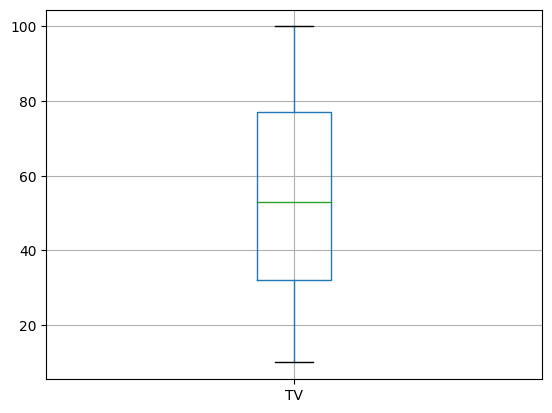

In [22]:
# вычисление границ межквартильного размаха
q1 = data['TV'].quantile(0.25)
q3 = data['TV'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# фильтрация аномальных значений
anomalies = data[(data['TV'] < lower_bound) | (data['TV'] > upper_bound)]
print(anomalies)

# построение графика boxplot
data.boxplot(column='TV')
plt.show()

        TV      Radio  Social Media       Sales  Macro  Mega  Micro  Nano
4331  99.0  48.871161      8.292208  349.156031      0     1      0     0


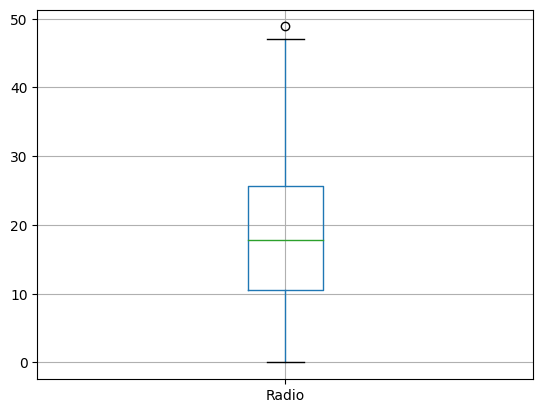

In [23]:
# вычисление границ межквартильного размаха
q1 = data['Radio'].quantile(0.25)
q3 = data['Radio'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# фильтрация аномальных значений
anomalies = data[(data['Radio'] < lower_bound) | (data['Radio'] > upper_bound)]
print(anomalies)

# построение графика boxplot
data.boxplot(column='Radio')
plt.show()


         TV      Radio  Social Media       Sales  Macro  Mega  Micro  Nano
140    95.0  36.422306      9.997472  335.301431      0     0      0     1
212   100.0  32.920194      9.904286  357.124573      0     0      0     1
468    67.0  27.533561     10.453921  242.587371      1     0      0     0
504    85.0  36.077756     11.403625  304.970625      1     0      0     0
558    95.0  43.129332     10.174983  339.871732      0     0      1     0
603    73.0  31.327127     10.260554  259.859083      0     0      0     1
867    74.0  30.967507     13.083957  266.757198      0     1      0     0
1235   94.0  39.221198     10.420853  336.888405      0     1      0     0
1363   90.0  36.551512      9.883176  317.576616      0     1      0     0
1412   84.0  34.984570     11.260430  301.493120      1     0      0     0
1468   83.0  32.790106     10.243735  296.812238      0     1      0     0
1872   86.0  33.250050     10.063746  304.428485      1     0      0     0
1929   75.0  29.621449   

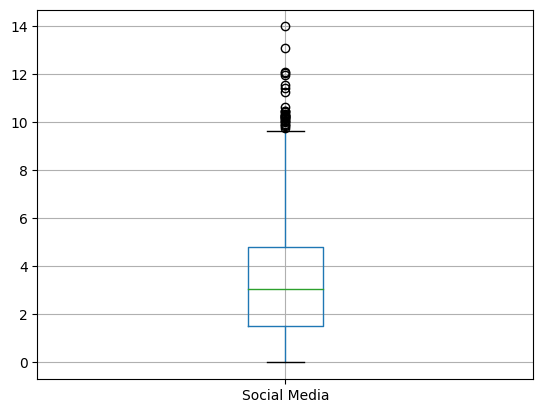

In [24]:
# вычисление границ межквартильного размаха
q1 = data['Social Media'].quantile(0.25)
q3 = data['Social Media'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# фильтрация аномальных значений
anomalies = data[(data['Social Media'] < lower_bound) | (data['Social Media'] > upper_bound)]
print(anomalies)

# построение графика boxplot
data.boxplot(column='Social Media')
plt.show()

Empty DataFrame
Columns: [TV, Radio, Social Media, Sales, Macro, Mega, Micro, Nano]
Index: []


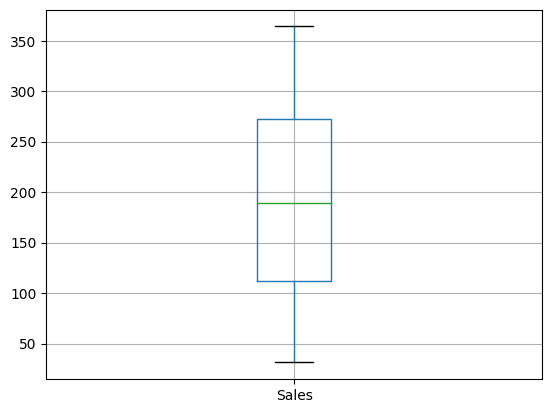

In [25]:
# вычисление границ межквартильного размаха
q1 = data['Sales'].quantile(0.25)
q3 = data['Sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# фильтрация аномальных значений
anomalies = data[(data['Sales'] < lower_bound) | (data['Sales'] > upper_bound)]
print(anomalies)

# построение графика boxplot
data.boxplot(column='Sales')
plt.show()

По выше выведенным графикам можно понять, что как таковых аномалий нет, есть отклонения, но они не критичны и сильно не повлияют на эффективность модели 

#Визуализация данных#

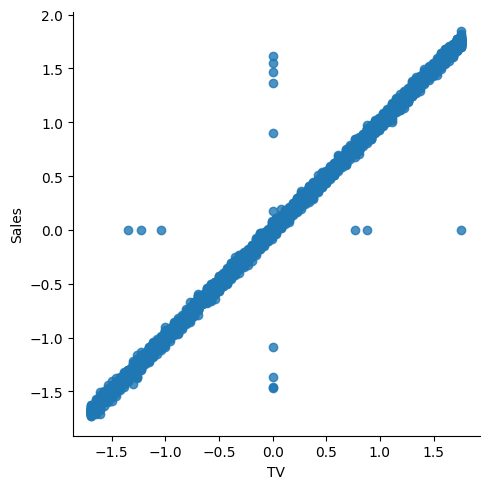

In [26]:
#линии регрессии
sns.lmplot(x = 'TV', y ='Sales', data = data_scaled)

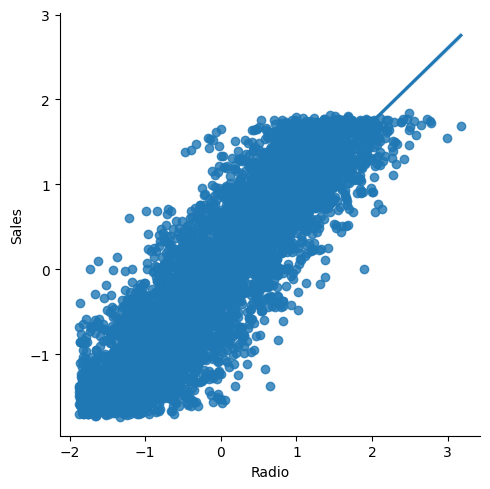

In [27]:
sns.lmplot(x = 'Radio', y ='Sales', data = data_scaled)

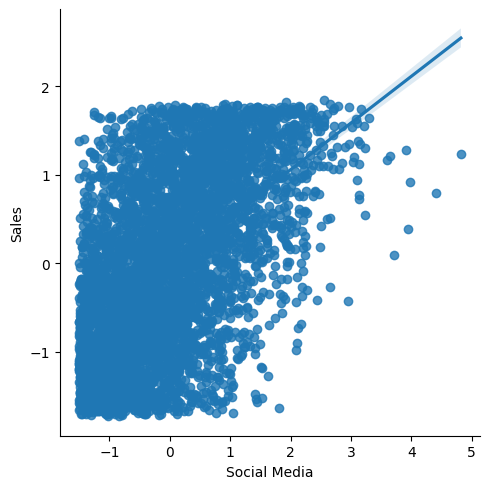

In [28]:
sns.lmplot(x = 'Social Media', y ='Sales', data = data_scaled)

<ipython-input-29-cadf8d954391>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TV'])


<Axes: xlabel='TV', ylabel='Density'>

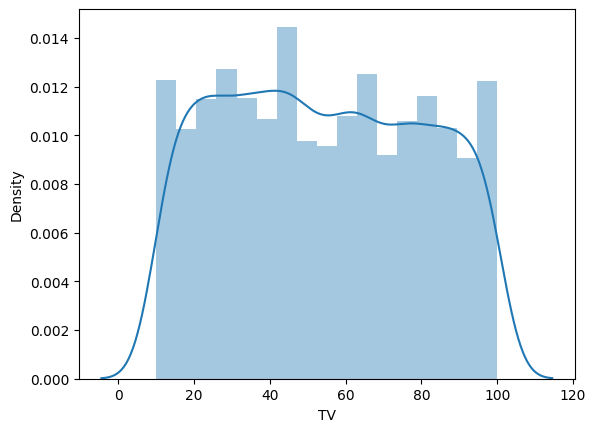

In [29]:
sns.distplot(data['TV'])

<ipython-input-30-2a4c8593908f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Radio'])


<Axes: xlabel='Radio', ylabel='Density'>

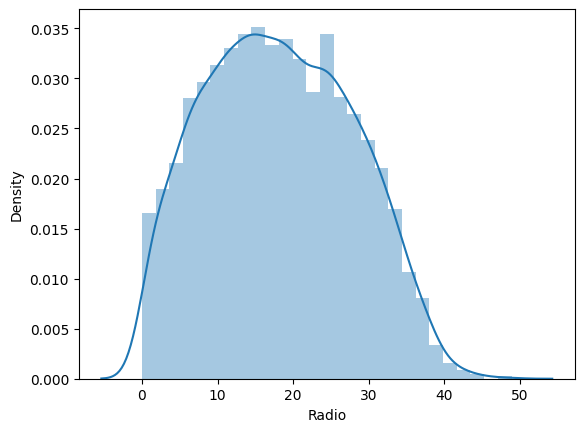

In [30]:
sns.distplot(data['Radio'])

<ipython-input-31-853fb953926b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Social Media'])


<Axes: xlabel='Social Media', ylabel='Density'>

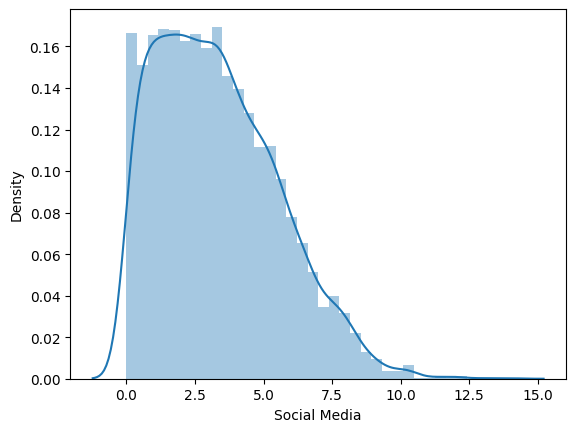

In [31]:
sns.distplot(data['Social Media'])

In [32]:
data_scaled.corr()

,TV,Radio,Social Media,Sales,Macro,Mega,Micro,Nano
TV,1.000000,0.866885,0.527010,0.996652,0.021335,-0.012630,-0.004863,-0.003645
Radio,0.866885,1.000000,0.606793,0.867369,0.009518,-0.005071,0.004212,-0.008601
Social Media,0.527010,0.606793,1.000000,0.528121,0.011631,0.013072,-0.013312,-0.011351
Sales,0.996652,0.867369,0.528121,1.000000,0.019267,-0.011701,-0.004099,-0.003289
Macro,0.021335,0.009518,0.011631,0.019267,1.000000,-0.332131,-0.331171,-0.328482
Mega,-0.012630,-0.005071,0.013072,-0.011701,-0.332131,1.000000,-0.338211,-0.335465
Micro,-0.004863,0.004212,-0.013312,-0.004099,-0.331171,-0.338211,1.000000,-0.334495
Nano,-0.003645,-0.008601,-0.011351,-0.003289,-0.328482,-0.335465,-0.334495,1.000000


<Axes: >

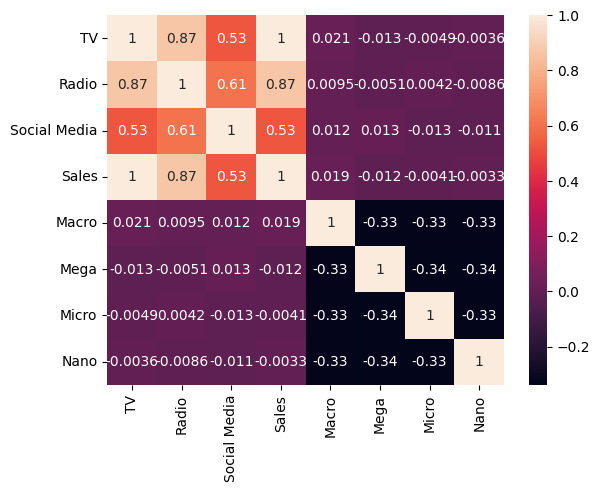

In [33]:
sns.heatmap(data_scaled.corr(),annot=True)

Заметим, что наибольшая корреляция между признаком TV и Sales, это говорит о том, что именно этот признак наибольшим образом влияет на целевую переменную

#Разделение данных на выборки#

**Мы получили приведенные данные и с ними уже можно начинать работать**

Сначала разделяем данные на признаки и зависимую переменную 

In [34]:
X=data_scaled.drop('Sales',axis=1)
X

,TV,Radio,Social Media,Macro,Mega,Micro,Nano
0,-1.458858,-1.198772,-0.188140,-0.570278,1.717028,-0.580718,-0.576003
1,-1.573828,-0.922550,-0.413568,-0.570278,1.717028,-0.580718,-0.576003
2,-0.500769,-0.235110,-0.185685,-0.570278,1.717028,-0.580718,-0.576003
3,1.108821,1.226229,1.627493,-0.570278,1.717028,-0.580718,-0.576003
4,-1.497181,-1.005302,-0.867471,-0.570278,-0.582402,1.722007,-0.576003
...,...,...,...,...,...,...,...
4567,-1.075622,-1.415268,-1.179057,-0.570278,-0.582402,1.722007,-0.576003
4568,0.648938,0.253351,1.457102,-0.570278,-0.582402,-0.580718,1.736101
4569,-0.385798,0.169538,0.801563,-0.570278,-0.582402,1.722007,-0.576003
4570,0.648938,-0.064696,-0.625553,1.753530,-0.582402,-0.580718,-0.576003


In [35]:
y=data_scaled['Sales']
y #зависимая переменная y

0      -1.480026
1      -1.566580
2      -0.454416
3       1.136662
4      -1.460024
          ...   
4567   -1.050708
4568    0.608578
4569   -0.309850
4570    0.657024
4571   -0.475643
Name: Sales, Length: 4572, dtype: float64

#Визуализация зависимости предсказываемой переменной от признаков#

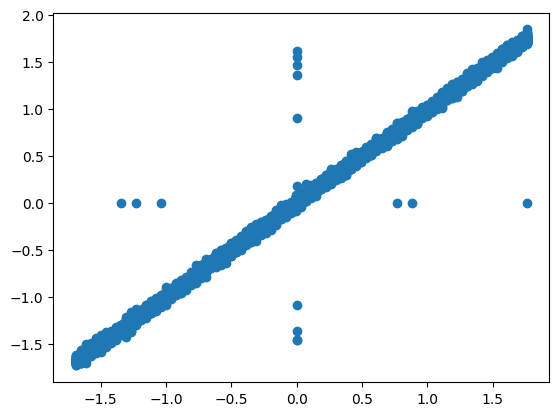

In [36]:
plt.scatter(X['TV'],y)

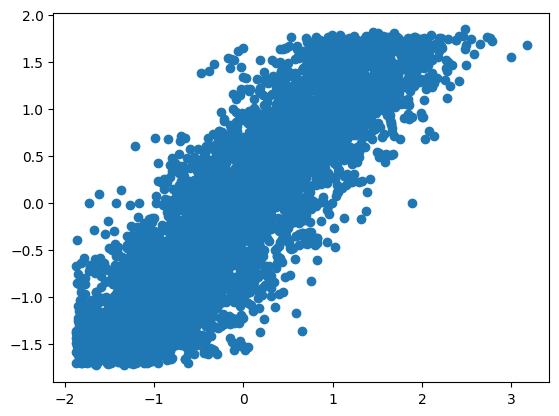

In [37]:
plt.scatter(X['Radio'],y)

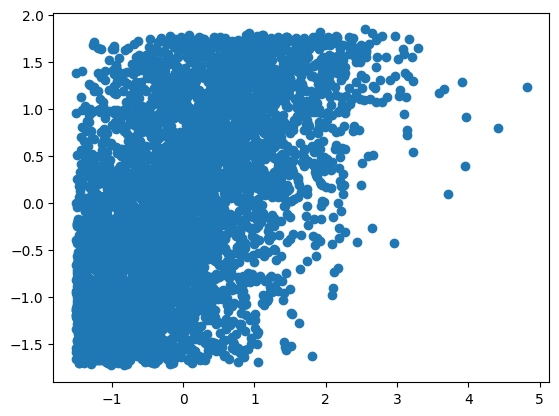

In [38]:
plt.scatter(X['Social Media'],y)

#Разделение на тренировочную и тестовую выборку#

Разделяю данные случайным образом 

Случайное разбиение:

Этот метод разбивает набор данных случайным образом на обучающую и тестовую выборки. Обычно используются соотношения 70/30 или 80/20 для разбиения набора данных на обучающую и тестовую выборки соответственно. Этот метод хорошо подходит для больших наборов данных, когда количество данных достаточно высоко. В таком случае, рандомизированное разбиение обеспечивает хорошее соотношение меток классов в обучающей и тестовой выборках.


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Создание сравнительной таблицы#

In [40]:
compare = pd.DataFrame(columns = ['metrics', 'Linear', 'RandomForestRegressor', 'DecisionTreeRegressor',
                                     'PolynomialFeatures', 'ElasticNet', 'Регрессия Лассо', 'Гребневая регрессия'])
compare['metrics'] = ['score','mean_absolute_error','root_mean_squared_error','r2_score']

#Линейная регрессия#

In [41]:
%%time
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred_ln = linear.predict(X_test)

CPU times: user 14 ms, sys: 9.67 ms, total: 23.7 ms
Wall time: 39.5 ms


In [42]:
print('Коэффициент детерминации: ',linear.score(X_train,y_train))

Коэффициент детерминации:  0.9955918829237552


In [43]:
# заметим, что коэффициент детерминации близок к 1, значит модель крайне эффективна

<Axes: xlabel='Sales'>

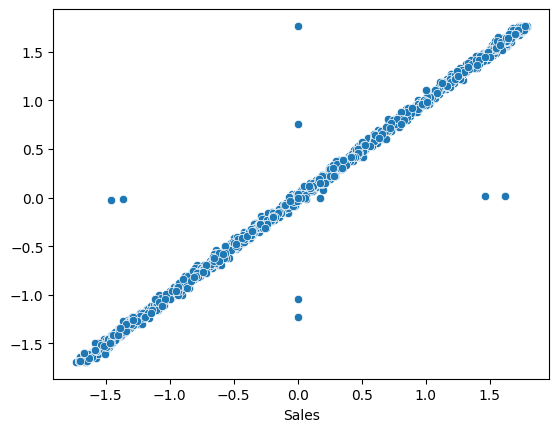

In [44]:
sns.scatterplot(x=y_test,y=y_pred_ln)

In [45]:
#Средняя абсолютная ошибка 
mean_absolute_error(y_test, y_pred_ln)

0.03387934740607156

In [46]:
# Cредняя квадратичная ошибка
mean_squared_error(y_test, y_pred_ln, squared=True)

0.01191375187360861

In [47]:
#RMSE
mean_squared_error(y_test, y_pred_ln, squared=False)

0.10915013455607193

In [48]:
#можем заметить, что ошибки крайне малы, что говорит о хорошей модели

In [49]:
print(r2_score(y_test, y_pred_ln))

0.9882339656360094


In [50]:
compare['Linear']=[linear.score(X_train,y_train),mean_absolute_error(y_test, y_pred_ln),mean_squared_error(y_test, y_pred_ln, squared=False),r2_score(y_test, y_pred_ln)]

#RandomForestRegressor#

In [51]:
%%time
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred_for = forest.predict(X_test)

CPU times: user 968 ms, sys: 136 ms, total: 1.1 s
Wall time: 1.01 s


In [52]:
forest.score(X_train, y_train)

0.9994585358802883

In [53]:
linear.score(X_train, y_train) < forest.score(X_train, y_train)

True

<Axes: xlabel='Sales'>

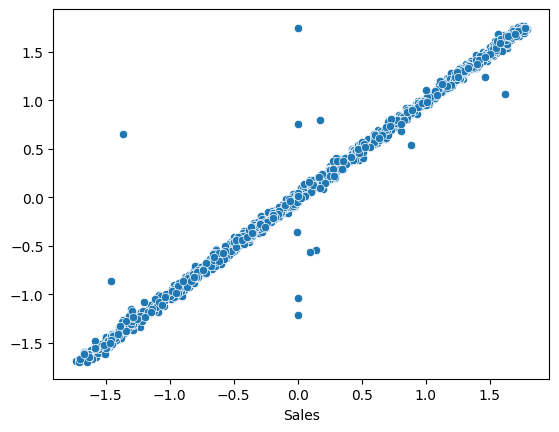

In [54]:
sns.scatterplot(x=y_test,y=y_pred_for)

In [55]:
#Средняя абсолютная ошибка 
mean_absolute_error(y_test, y_pred_for)

0.03682052332006827

In [56]:
#RMSE
mean_squared_error(y_test, y_pred_for, squared=False)

0.10222780515530794

In [57]:
print(r2_score(y_test, y_pred_for))

0.989679050937246


In [58]:
compare['RandomForestRegressor']=[forest.score(X_train,y_train),mean_absolute_error(y_test, y_pred_for),mean_squared_error(y_test, y_pred_for, squared=False),r2_score(y_test, y_pred_for)]

#DecisionTreeRegressor#

In [59]:
%%time
des_tree = DecisionTreeRegressor()
des_tree.fit(X_train, y_train)
y_pred_tree = des_tree.predict(X_test)

CPU times: user 19.5 ms, sys: 0 ns, total: 19.5 ms
Wall time: 19.6 ms


In [60]:
des_tree.score(X_train, y_train)

1.0

In [61]:
des_tree.score(X_train, y_train)>forest.score(X_train, y_train)

True

<Axes: xlabel='Sales'>

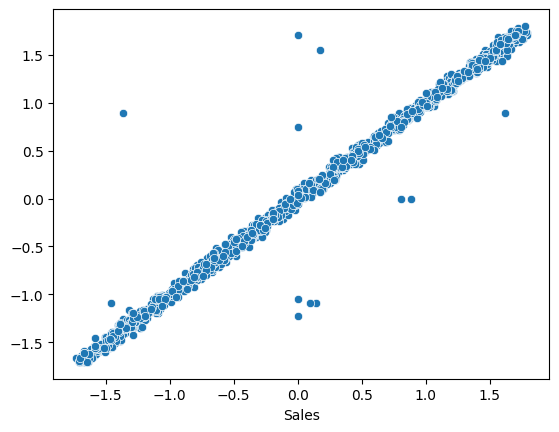

In [62]:
sns.scatterplot(x=y_test,y=y_pred_tree)

In [63]:
#Средняя абсолютная ошибка 
mean_absolute_error(y_test, y_pred_tree)

0.047017070584640774

In [64]:
#RMSE
mean_squared_error(y_test, y_pred_tree, squared=False)

0.1239619781784005

In [65]:
print(r2_score(y_test, y_pred_tree))

0.9848239566741231


In [66]:
compare['DecisionTreeRegressor']=[des_tree.score(X_train,y_train),mean_absolute_error(y_test, y_pred_tree),mean_squared_error(y_test, y_pred_tree, squared=False),r2_score(y_test, y_pred_tree)]

#PolynomialFeatures#

In [67]:
poly_tr = PolynomialFeatures(2).fit_transform(X_train)
poly_test = PolynomialFeatures(2).fit_transform(X_test)

In [68]:
%%time
polynomial = LinearRegression()
polynomial.fit(poly_tr, y_train)
y_pred_poly = polynomial.predict(poly_test)

CPU times: user 9.4 ms, sys: 2.92 ms, total: 12.3 ms
Wall time: 9.82 ms


In [69]:
polynomial.score(poly_tr, y_train)

0.9956214261065665

In [70]:
polynomial.score(poly_tr, y_train)>linear.score(X_train, y_train)

True

<Axes: xlabel='Sales'>

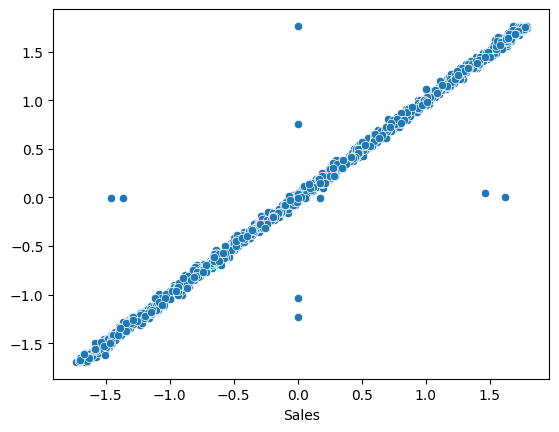

In [71]:
sns.scatterplot(x=y_test,y=y_pred_poly )

In [72]:
#Средняя абсолютная ошибка 
mean_absolute_error(y_test, y_pred_poly )

0.03418650264462965

In [73]:
#RMSE
mean_squared_error(y_test, y_pred_poly , squared=False)

0.10923300045554646

In [74]:
print(r2_score(y_test, y_pred_poly ))

0.9882160934981143


In [75]:
compare['PolynomialFeatures']=[polynomial.score(poly_tr, y_train),mean_absolute_error(y_test, y_pred_poly),mean_squared_error(y_test, y_pred_poly, squared=False),r2_score(y_test, y_pred_poly)]

#ElasticNet#

In [76]:
elnet=ElasticNet()

In [77]:
parameters = {'alpha': [0.2, 1, 5, 8, 100, 120],'l1_ratio': [0.1, 0.2, 0.5, 1,0.6,2]}

In [78]:
%%time
gr = GridSearchCV(elnet, param_grid = parameters, cv=6, refit = True)
gr.fit(X_train, y_train)

CPU times: user 1.47 s, sys: 1.19 s, total: 2.66 s
Wall time: 1.45 s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 892, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packa

GridSearchCV(cv=6, estimator=ElasticNet(),
             param_grid={'alpha': [0.2, 1, 5, 8, 100, 120],
                         'l1_ratio': [0.1, 0.2, 0.5, 1, 0.6, 2]})

In [79]:
gr.best_params_

{'alpha': 0.2, 'l1_ratio': 0.2}

In [80]:
%%time
elnet1 = ElasticNet(alpha = 0.2, l1_ratio = 0.2)
elnet1.fit(X_train, y_train)
y_pred_el=elnet1.predict(X_test)

CPU times: user 11.8 ms, sys: 14.6 ms, total: 26.3 ms
Wall time: 28 ms


In [81]:
elnet1.score(X_train, y_train)

0.9629674944875867

<Axes: xlabel='Sales'>

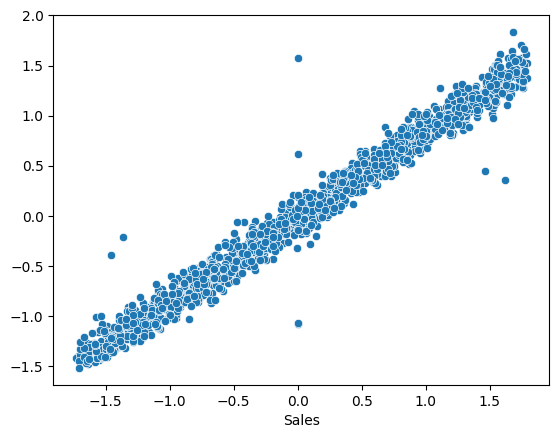

In [82]:
sns.scatterplot(x=y_test,y=y_pred_el )

In [83]:
mean_absolute_error(y_test, y_pred_el)

0.15934884474466202

In [84]:
mean_squared_error(y_test, y_pred_el,squared=False)

0.20651790059821373

In [85]:
r2_score(y_test,y_pred_el)

0.9578791657220176

In [86]:
compare['ElasticNet']=[elnet1.score(X_train, y_train),mean_absolute_error(y_test, y_pred_el),mean_squared_error(y_test, y_pred_el, squared=False),r2_score(y_test, y_pred_el)]

#Регрессия Лассо#

In [87]:
%%time
lasso = Lasso()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
gr = GridSearchCV(lasso, param_grid = parameters, cv=6, refit = True)
gr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.087e+00, tolerance: 2.655e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.853e-01, tolerance: 2.688e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.401e-01, tolerance: 2.613e

CPU times: user 1.04 s, sys: 799 ms, total: 1.84 s
Wall time: 1.88 s


GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [88]:
gr.best_params_

{'alpha': 0.001}

In [89]:
%%time
lasso1 = Lasso(alpha = 0.0001)
lasso1.fit(X_train, y_train)
y_pred_lass=lasso1.predict(X_test)

CPU times: user 8.8 ms, sys: 15.2 ms, total: 24 ms
Wall time: 24.1 ms


In [90]:
lasso1.score(X_train, y_train)

0.9955918276655885

<Axes: xlabel='Sales'>

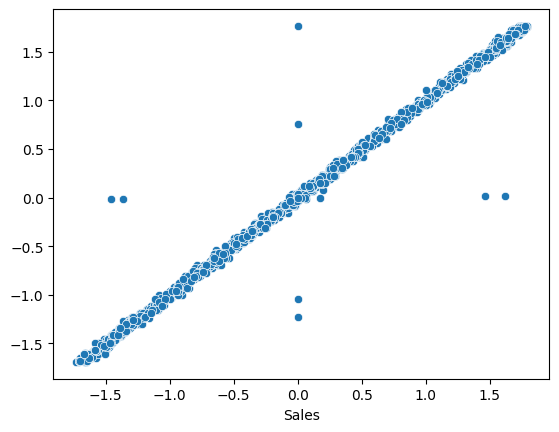

In [91]:
sns.scatterplot(x=y_test,y=y_pred_lass )

In [92]:
mean_absolute_error(y_test, y_pred_lass)

0.03385218754957898

In [93]:
mean_squared_error(y_test, y_pred_lass,squared=False)

0.10915250893472982

In [94]:
r2_score(y_test,y_pred_lass)

0.9882334537296364

In [95]:
compare['Регрессия Лассо']=[lasso1.score(X_train, y_train),mean_absolute_error(y_test, y_pred_lass),mean_squared_error(y_test, y_pred_lass, squared=False),r2_score(y_test, y_pred_lass)]

#Гребневая регрессия#

In [96]:
from sklearn.linear_model import Ridge

In [97]:
%%time
ridge = Ridge()

parameters = {"alpha":[1e-15,1e-12,1e-11, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
gr = GridSearchCV(ridge, param_grid = parameters, cv=6, refit = True)
gr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.68642e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.36516e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


CPU times: user 725 ms, sys: 789 ms, total: 1.51 s
Wall time: 825 ms


GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-12, 1e-11, 1e-10, 1e-08, 0.0001,
                                   0.001, 0.01, 1, 5, 10, 20]})

In [98]:
gr.best_params_

{'alpha': 1e-15}

In [99]:
%%time
ridge1 = Ridge(alpha = 0.01)
ridge1.fit(X_train, y_train)
y_pred_ri=ridge1.predict(X_test)

CPU times: user 11.2 ms, sys: 13.7 ms, total: 24.9 ms
Wall time: 21.3 ms


In [100]:
ridge1.score(X_train, y_train)

0.9955918828852861

<Axes: xlabel='Sales'>

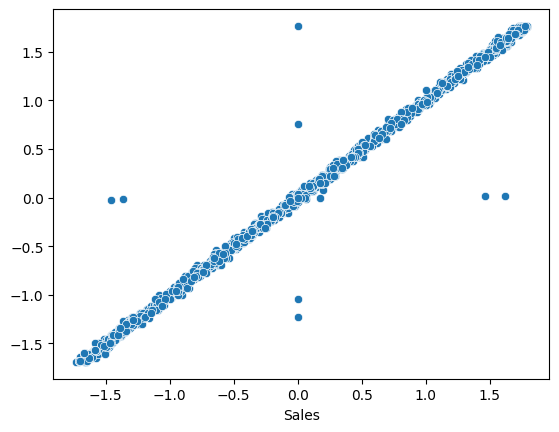

In [101]:
sns.scatterplot(x=y_test,y=y_pred_ri )

In [102]:
mean_absolute_error(y_test, y_pred_ri)

0.03387994696897028

In [103]:
mean_squared_error(y_test, y_pred_ri,squared=False)

0.10914962446840042

In [104]:
r2_score(y_test,y_pred_ri)

0.9882340756073819

In [105]:
compare['Гребневая регрессия']=[ridge1.score(X_train, y_train),mean_absolute_error(y_test, y_pred_ri),mean_squared_error(y_test, y_pred_ri, squared=False),r2_score(y_test, y_pred_ri)]

#Сравнение моделей#

In [106]:
compare

,metrics,Linear,RandomForestRegressor,DecisionTreeRegressor,PolynomialFeatures,ElasticNet,Регрессия Лассо,Гребневая регрессия
0,score,0.995592,0.999459,1.000000,0.995621,0.962967,0.995592,0.995592
1,mean_absolute_error,0.033879,0.036821,0.047017,0.034187,0.159349,0.033852,0.033880
2,root_mean_squared_error,0.109150,0.102228,0.123962,0.109233,0.206518,0.109153,0.109150
3,r2_score,0.988234,0.989679,0.984824,0.988216,0.957879,0.988233,0.988234


In [107]:
compare.max(axis="columns")

<ipython-input-107-b3129ebfaca1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  compare.max(axis="columns")


0    1.000000
1    0.159349
2    0.206518
3    0.989679
dtype: float64

In [108]:
compare.min(axis="columns")

<ipython-input-108-f238ba2b7928>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  compare.min(axis="columns")


0    0.962967
1    0.033852
2    0.102228
3    0.957879
dtype: float64

Исходя из данных в сравнительной таблице, можно сделать вывод о том, что в нашем случае лучшими являются модели **RandomForestRegressor** и  **PolynomialFeatures**, так как метрики r2_score наибольшии, а ошибки наоборот наименьшие.

Самой неэффективной моделью является модель **ElasticNet**, r2_score наименьшая, а значение ошибок велико

#Улучшение модели#

In [109]:
poly_tr_new = PolynomialFeatures(degree=5).fit_transform(X_train)
poly_test_new = PolynomialFeatures(degree=5).fit_transform(X_test)

In [110]:
%%time
polynomial_new = LinearRegression()
polynomial_new.fit(poly_tr_new, y_train)
y_pred_poly_new = polynomial_new.predict(poly_test_new)

CPU times: user 834 ms, sys: 160 ms, total: 994 ms
Wall time: 575 ms


In [111]:
polynomial_new.score(poly_tr_new, y_train)

0.9963191837905274

In [112]:
polynomial_new.score(poly_tr_new, y_train)>polynomial.score(poly_tr, y_train)

True

<Axes: xlabel='Sales'>

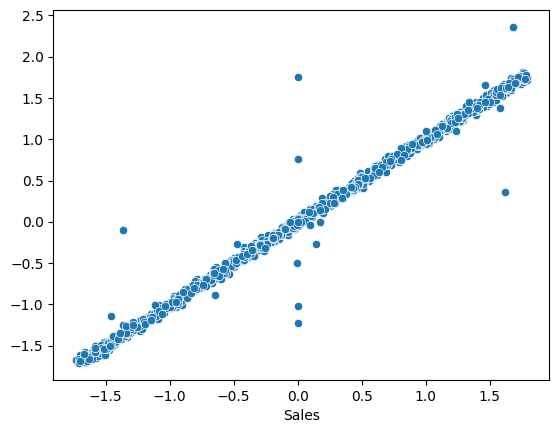

In [113]:
sns.scatterplot(x=y_test,y=y_pred_poly_new )

In [114]:
#Средняя абсолютная ошибка 
mean_absolute_error(y_test, y_pred_poly_new )

0.03603243899238888

In [115]:
#RMSE
mean_squared_error(y_test, y_pred_poly_new , squared=False)

0.09478173274401835

In [116]:
print(r2_score(y_test, y_pred_poly_new))

0.9911278096782001


In [117]:
r2_score(y_test, y_pred_poly_new)>r2_score(y_test, y_pred_poly)

True

In [118]:
r2_score(y_test, y_pred_poly_new)>r2_score(y_test, y_pred_for)

True

Результаты данной модели лучше, чем двух выбранных ранее

#Проверка на переобучение модели#

In [119]:
cv_scores = cross_val_score(polynomial_new, poly_tr_new, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores), "+/-", np.std(cv_scores))


Cross-validation scores: [0.99843204 0.99312606 0.99169124 0.996119   0.99493174]
Average accuracy: 0.9948600152182777 +/- 0.002340824059234207


In [120]:
cv_scores1 = cross_val_score(polynomial_new, poly_test_new, y_test, cv=5)

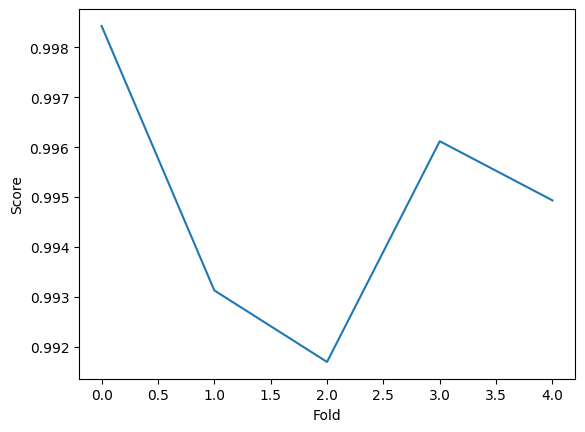

In [121]:
plt.plot(cv_scores)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.show()



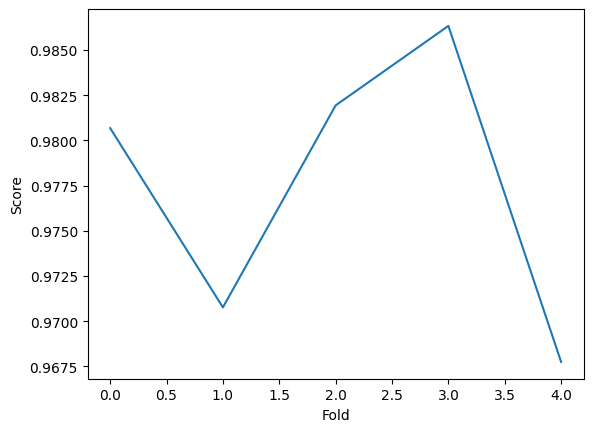

In [122]:
plt.plot(cv_scores1)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.show()


Модель не переобучена, о чем свидетельствуют хорошие показатели коэффициента детерминации, а также результаты кросс-валидации